This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
lead = 3 
obs = 1

data = pd.read_csv("../csv/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs_dataset_with_pts.csv".format(lead, obs, lead, obs))
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
13953        3352386      0    563.0  45.0           36.0            36.0   
13954        3352563      0    743.0  34.0           54.0            54.0   
13955        3352747      0   1066.0  30.0           31.0            31.0   
13956        3353044      0   3218.0  52.0           41.0            41.0   
13957        3353077      0   1310.0  60.0           36.0            36.0   

       UrgentAdmission  AdmissionCategory  NumBeds  TeachingStatus  ...  \
0                  0.0                4.0      2.0               0  ...   
1                  0.0                4.0      4.0               1  ...   
2                  1.0                4.0      2.0               0  ...   
3                  1.0                4.0      4.0               1  ...   
4                  0.0                4.0      4.0               1  ...   
...                ...                ...      ...             ...  ...   
13953              0.0                2.0      2.0               0  ...   
13954              0.0                4.0      2.0               0  ...   
13955              0.0                4.0      4.0               0  ...   
13956              0.0                4.0      2.0               0  ...   
13957              0.0                4.0      4.0               0  ...   

      comorbidity_rheumd comorbidity_coag comorbidity_obes comorbidity_wloss  \
0                      0                0                0                 0   
1                      0                0                0                 0   
2                      0                0                0                 0   
3                      0                0                0                 0   
4                      0                0                0                 0   
...                  ...              ...              ...               ...   
13953                  0                0                0                 0   
13954                  0                0                0                 0   
13955                  0                0                0                 0   
13956                  0                0                0                 0   
13957                  0                0                0                 0   

      comorbidity_fed comorbidity_blane comorbidity_dane comorbidity_alcohol  \
0                   0                 0                0                   0   
1                   0                 0                0                   0   
2                   0                 0                0                   0   
3                   0                 0                0                   0   
4                   0                 0                0                   1   
...               ...               ...              ...                 ...   
13953               0                 0                0                   0   
13954               0                 0                0                   0   
13955               0                 0                0                   0   
13956               1                 0                0                   0   
13957               0                 0                0                   0   

      comorbidity_drug comorbidity_depre  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
.

In [3]:
data = process_all(data)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
13953        3352386      0    563.0  45.0           36.0            36.0   
13954        3352563      0    743.0  34.0           54.0            54.0   
13955        3352747      0   1066.0  30.0           31.0            31.0   
13956        3353044      0   3218.0  52.0           41.0            41.0   
13957        3353077      0   1310.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
13953              0.0      2.0               0     1.0  ...   
13954              0.0      2.0               0     1.0  ...   
13955              0.0      4.0               0     0.0  ...   
13956              0.0      2.0               0     0.0  ...   
13957              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
13953                  0                     0                              0   
13954                  0                     0                              0   
13955                  0                     0                              0   
13956                  0                     0                              0   
13957                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
13953                     0                    0                   1   
13954                     0                    0                   1   
13955                     0                    0                   1   
13956                     0                    0                   1   
13957                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [4]:
for col in data.columns:
    if missing_data(data, col)[0] > 0.2*missing_data(data,col)[1]:
        data.drop(labels=[col], axis=1, inplace=True)
data

PatientStayID  Class      LOS   Age  APACHEIVscore  APACHEIVaScore  \
0             150934      1    646.0  69.0           78.0            78.0   
1             151708      1   1827.0  79.0           38.0            38.0   
2             152171      1   2200.0  84.0           38.0            38.0   
3             155126      1   3341.0  71.0           65.0            65.0   
4             156970      1  17819.0  56.0           32.0            32.0   
...              ...    ...      ...   ...            ...             ...   
13953        3352386      0    563.0  45.0           36.0            36.0   
13954        3352563      0    743.0  34.0           54.0            54.0   
13955        3352747      0   1066.0  30.0           31.0            31.0   
13956        3353044      0   3218.0  52.0           41.0            41.0   
13957        3353077      0   1310.0  60.0           36.0            36.0   

       UrgentAdmission  NumBeds  TeachingStatus  Gender  ...  \
0                  0.0      2.0               0     1.0  ...   
1                  0.0      4.0               1     0.0  ...   
2                  1.0      2.0               0     1.0  ...   
3                  1.0      4.0               1     0.0  ...   
4                  0.0      4.0               1     0.0  ...   
...                ...      ...             ...     ...  ...   
13953              0.0      2.0               0     1.0  ...   
13954              0.0      2.0               0     1.0  ...   
13955              0.0      4.0               0     0.0  ...   
13956              0.0      2.0               0     0.0  ...   
13957              0.0      4.0               0     1.0  ...   

      UnitAdmitSource_OR UnitAdmitSource_Other  UnitAdmitSource_OtherHospital  \
0                      0                     0                              0   
1                      0                     0                              0   
2                      1                     0                              0   
3                      1                     0                              0   
4                      0                     0                              0   
...                  ...                   ...                            ...   
13953                  0                     0                              0   
13954                  0                     0                              0   
13955                  0                     0                              0   
13956                  0                     0                              0   
13957                  0                     0                              0   

       UnitAdmitSource_PACU  UnitAdmitSource_SDU  UnitStayType_Admit  \
0                         0                    0                   1   
1                         0                    0                   1   
2                         0                    0                   1   
3                         0                    0                   1   
4                         0                    0                   1   
...                     ...                  ...                 ...   
13953                     0                    0                   1   
13954                     0                    0                   1   
13955                     0                    0                   1   
13956                     0                    0                   1   
13957                     0                    0                   1   

       UnitStayType_Readmit  UnitStayType_Stepdown  UnitStayType_Transfer  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...          

In [5]:
common_imputation= ["Gender", "UrgentAdmission"]
one_hot_removal =["UnitAdmitSource_Missing"]
remove = ["APACHEIVaScore", "relative_{}hr_lead_{}hr_obsHaloperidol".format(lead, obs), "relative_{}hr_lead_{}hr_obsPrecedex".format(lead, obs) ]#, "mean_motor_GCS", "mean_verbal_GCS", "mean_eyes_GCS", "mean_total_GCS"]

# common_imputation = ["Gender"]
# one_hot_removal = []
# remove = []

exceptions =["last_verbal_GCS", "last_eyes_GCS", "last_total_GCS"]

mean_imputation = data.columns 
mean_imputation = mean_imputation.drop(common_imputation)
mean_imputation = mean_imputation.drop(one_hot_removal)
mean_imputation = mean_imputation.drop(remove)
mean_imputation = mean_imputation.drop(exceptions)
mean_imputation = mean_imputation.tolist()

In [6]:
from sklearn.impute import SimpleImputer
data.drop(remove, axis=1, inplace = True)
imp_mean = SimpleImputer(strategy='mean')
data[mean_imputation] = imp_mean.fit_transform(data[mean_imputation])
imp_freq = SimpleImputer(strategy='most_frequent')
data[common_imputation] = imp_freq.fit_transform(data[common_imputation])
data[one_hot_removal] = data[one_hot_removal].replace(1, np.NaN)

In [7]:
data.dropna(inplace = True)
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
print(len(data.index))
data

12201


PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
15          200923.0  12765.0  79.0      84.000000              0.0      4.0   
18          213517.0  51305.0  49.0     117.000000              0.0      4.0   
26          242154.0   5460.0  46.0      77.000000              0.0      4.0   
27          242505.0   5720.0  90.0      78.000000              0.0      4.0   
28          246416.0   1194.0  89.0      65.000000              0.0      4.0   
...              ...      ...   ...            ...              ...      ...   
13843      3200031.0    453.0  63.0      58.457999              0.0      4.0   
13844      3200331.0    553.0  23.0      79.000000              0.0      4.0   
13853      3328663.0  11095.0  48.0      77.000000              0.0      4.0   
13915      3343219.0    130.0  41.0      41.000000              0.0      2.0   
13941      3349777.0  25881.0  60.0      33.000000              0.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
15                1.0     1.0       162.60        99.20  ...   
18                1.0     1.0       188.00       130.50  ...   
26                0.0     1.0       157.48        53.09  ...   
27                0.0     1.0       165.10        61.80  ...   
28                0.0     0.0       177.80        75.00  ...   
...               ...     ...          ...          ...  ...   
13843             1.0     1.0       165.00        72.50  ...   
13844             1.0     1.0       173.00        50.90  ...   
13853             0.0     1.0       170.10       109.30  ...   
13915             0.0     1.0       165.10        90.70  ...   
13941             0.0     0.0       182.90        87.00  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15                    0.0                    0.0   
18                    0.0                    0.0   
26                    0.0                    0.0   
27                    0.0                    0.0   
28                    0.0                    0.0   
...                   ...                    ...   
13843                 0.0                    0.0   
13844                 0.0                    0.0   
13853                 0.0                    0.0   
13915                 0.0                    0.0   
13941                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                               0.0                   0.0   
18                               1.0                   0.0   
26                               0.0                   0.0   
27                               0.0                   0.0   
28                               0.0                   0.0   
...                              ...                   ...   
13843                            0.0                   0.0   
13844                            0.0                   0.0   
13853                            0.0                   0.0   
13915                            0.0                   0.0   
13941                            0.0                   0.0   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                     1.0                 0.0                   1.0   
18                     0.0                 1.0                   0.0   
26                     0.0                 1.0                   0.0   
27                     0.0                 1.0                   0.0   
28                     0.0                 1.0                   0.0   
...                    ...                 ...                   ...   
13843                  0.0                 0.0                   0.0   
13844                  0.0                 1.0                   0.0   
13853                  0.0                 1.0                   0.0   
13915                  0.0                 1.0                   0.0   
13941                  0.0                 1.0                   0.0   

       UnitStayType_Stepdown  UnitStayType

In [8]:
print(np.sum(labels==1))

2630


In [9]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID        LOS       Age  APACHEIVscore  UrgentAdmission  \
15          200923.0   2.577482  0.912558       1.008560        -0.342502   
18          213517.0  12.417527 -0.911382       2.338111        -0.342502   
26          242154.0   0.712367 -1.093776       0.726534        -0.342502   
27          242505.0   0.778750  1.581336       0.766824        -0.342502   
28          246416.0  -0.376830  1.520538       0.243061        -0.342502   
...              ...        ...       ...            ...              ...   
13843      3200031.0  -0.566022 -0.060210      -0.020513        -0.342502   
13844      3200331.0  -0.540490 -2.492130       0.807113        -0.342502   
13853      3328663.0   2.151097 -0.972180       0.726534        -0.342502   
13915      3343219.0  -0.648491 -1.397766      -0.723885        -0.342502   
13941      3349777.0   5.926263 -0.242604      -1.046201        -0.342502   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
15     0.854204        1.132749  1.061995    -0.340714     0.543229  ...   
18     0.854204        1.132749  1.061995     1.078893     1.688244  ...   
26     0.854204       -0.882808  1.061995    -0.626871    -1.143563  ...   
27     0.854204       -0.882808  1.061995    -0.200989    -0.824935  ...   
28     0.854204       -0.882808 -0.941624     0.508814    -0.342053  ...   
...         ...             ...       ...          ...          ...  ...   
13843  0.854204        1.132749  1.061995    -0.206578    -0.433508  ...   
13844  0.854204        1.132749  1.061995     0.240542    -1.223678  ...   
13853  0.854204       -0.882808  1.061995     0.078461     0.912707  ...   
13915 -1.734526       -0.882808  1.061995    -0.200989     0.232283  ...   
13941  0.854204       -0.882808 -0.941624     0.793854     0.096930  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
15              -0.281357              -0.042502   
18              -0.281357              -0.042502   
26              -0.281357              -0.042502   
27              -0.281357              -0.042502   
28              -0.281357              -0.042502   
...                   ...                    ...   
13843           -0.281357              -0.042502   
13844           -0.281357              -0.042502   
13853           -0.281357              -0.042502   
13915           -0.281357              -0.042502   
13941           -0.281357              -0.042502   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
15                         -0.217477             -0.231378   
18                          4.598193             -0.231378   
26                         -0.217477             -0.231378   
27                         -0.217477             -0.231378   
28                         -0.217477             -0.231378   
...                              ...                   ...   
13843                      -0.217477             -0.231378   
13844                      -0.217477             -0.231378   
13853                      -0.217477             -0.231378   
13915                      -0.217477             -0.231378   
13941                      -0.217477             -0.231378   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
15                6.622433           -2.730440              4.005060   
18               -0.151002            0.366241             -0.249684   
26               -0.151002            0.366241             -0.249684   
27               -0.151002            0.366241             -0.249684   
28               -0.151002            0.366241             -0.249684   
...                    ...                 ...                   ...   
13843            -0.151002           -2.730440             -0.249684   
13844            -0.151002            0.366241             -0.249684   
13853            -0.151002            0.366241             -0.249684   
13915            -0.151002            0.366241             -0.249684   
13941  

# Visualize Data

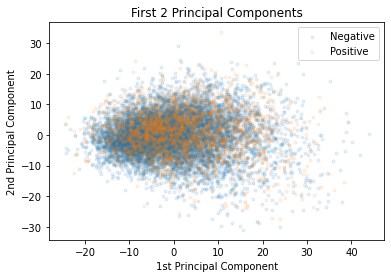

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [11]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_{}hr_lead_{}hr_obs_data/relative_{}hr_lead_{}hr_obs".format(lead, obs, lead, obs), calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.015, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


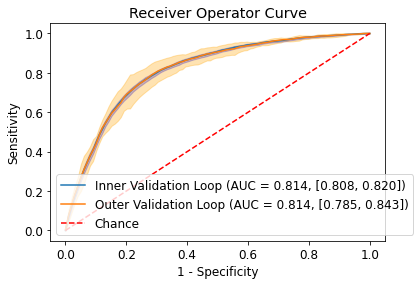

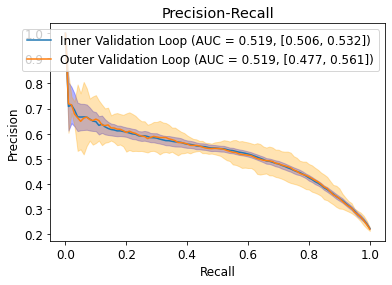

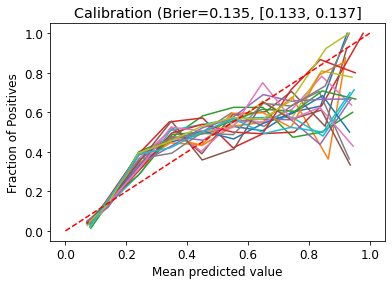

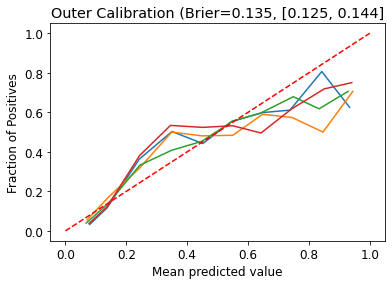

In [12]:
result_dict = lr_calibrated
name = "relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated".format(lead, obs)
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.015, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [14]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])
import pickle as pickle
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_selected_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(selected_feat, f)

123
LOS
Age
APACHEIVscore
UrgentAdmission
TeachingStatus
Gender
AdmitHeight
HistAngina
HistCABG
HistPulmEmb
HistHeartTransp
HistPUD
HistChemotherapy
HistRadiationTherapy
HistDementia
HistNeuromuscularDis
HistSeizures
HistTIA
HistRestrictiveDis
relative_3hr_lead_1hr_obsAdrenergicBronchodilators
relative_3hr_lead_1hr_obsaminoglycosides
relative_3hr_lead_1hr_obsAnticholinergicBronchodilators
relative_3hr_lead_1hr_obsAnticoagulants
relative_3hr_lead_1hr_obsBenzodiazepines
relative_3hr_lead_1hr_obsCephalosporins
relative_3hr_lead_1hr_obsGeneralAnesthetics
relative_3hr_lead_1hr_obsGlycopeptides
relative_3hr_lead_1hr_obsH2Blockers
relative_3hr_lead_1hr_obsInsulins
relative_3hr_lead_1hr_obsLaxatives
relative_3hr_lead_1hr_obsLincomycins
relative_3hr_lead_1hr_obsMacrolides
relative_3hr_lead_1hr_obsMAOIAntidepressants
relative_3hr_lead_1hr_obsNeuromuscularBlockers
relative_3hr_lead_1hr_obsOpioids
relative_3hr_lead_1hr_obsPenicillins
relative_3hr_lead_1hr_obsPhenylpiperazineAntidepressants
relativ

In [15]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl".format(lead, obs), "wb") as f:
    pickle.dump(dropped_feat, f)

431
NumBeds
AdmitWeight
HistAICD
HistArrythmia
HistCHF
HistExerciseTol
HistHypertension
HistMI
HistPacemaker
HistPVD
HistPCI
HistValveDis
HistVenThromb
HistCushing
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
Histdiabetes
HistSteroid Use
HistCirrhosis
HistHypersplenism
HistLiverTransp
HistAplasticAnemia
HistCancer
HistClottingDisorder
HistHemolyticAnemia
HistHypercoagulableCondition
HistOncology
HistMyeloproliferativeDisease
HistSickleCellDisease
HistImmuneSuppr
HistIntracranialMass
HistStrokes
HistAsthma
HistCOPD
HistRespiratoryFail
HistLungTransp
HistSarcoidosis
HistStoneDisease
HistNeurogenicBladd
HistRenalFail
HistRenalInsuff
HistRTA
HistRenalTransp
HistRheumatic
relative_3hr_lead_1hr_obsAnticholinergics
relative_3hr_lead_1hr_obsAntidiarrheals
relative_3hr_lead_1hr_obsAntiemetics
relative_3hr_lead_1hr_obsAntihistamines
relative_3hr_lead_1hr_obsBarbiturates
relative_3hr_lead_1hr_obsBetaBlockers
relative_3hr_lead_1hr_obsCalciumChannelBlockers
relative_3hr_lead_1hr_obsCarbapenem

In [16]:
with open("../pickle/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_dropped_feats.pkl".format(lead, obs), "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [17]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

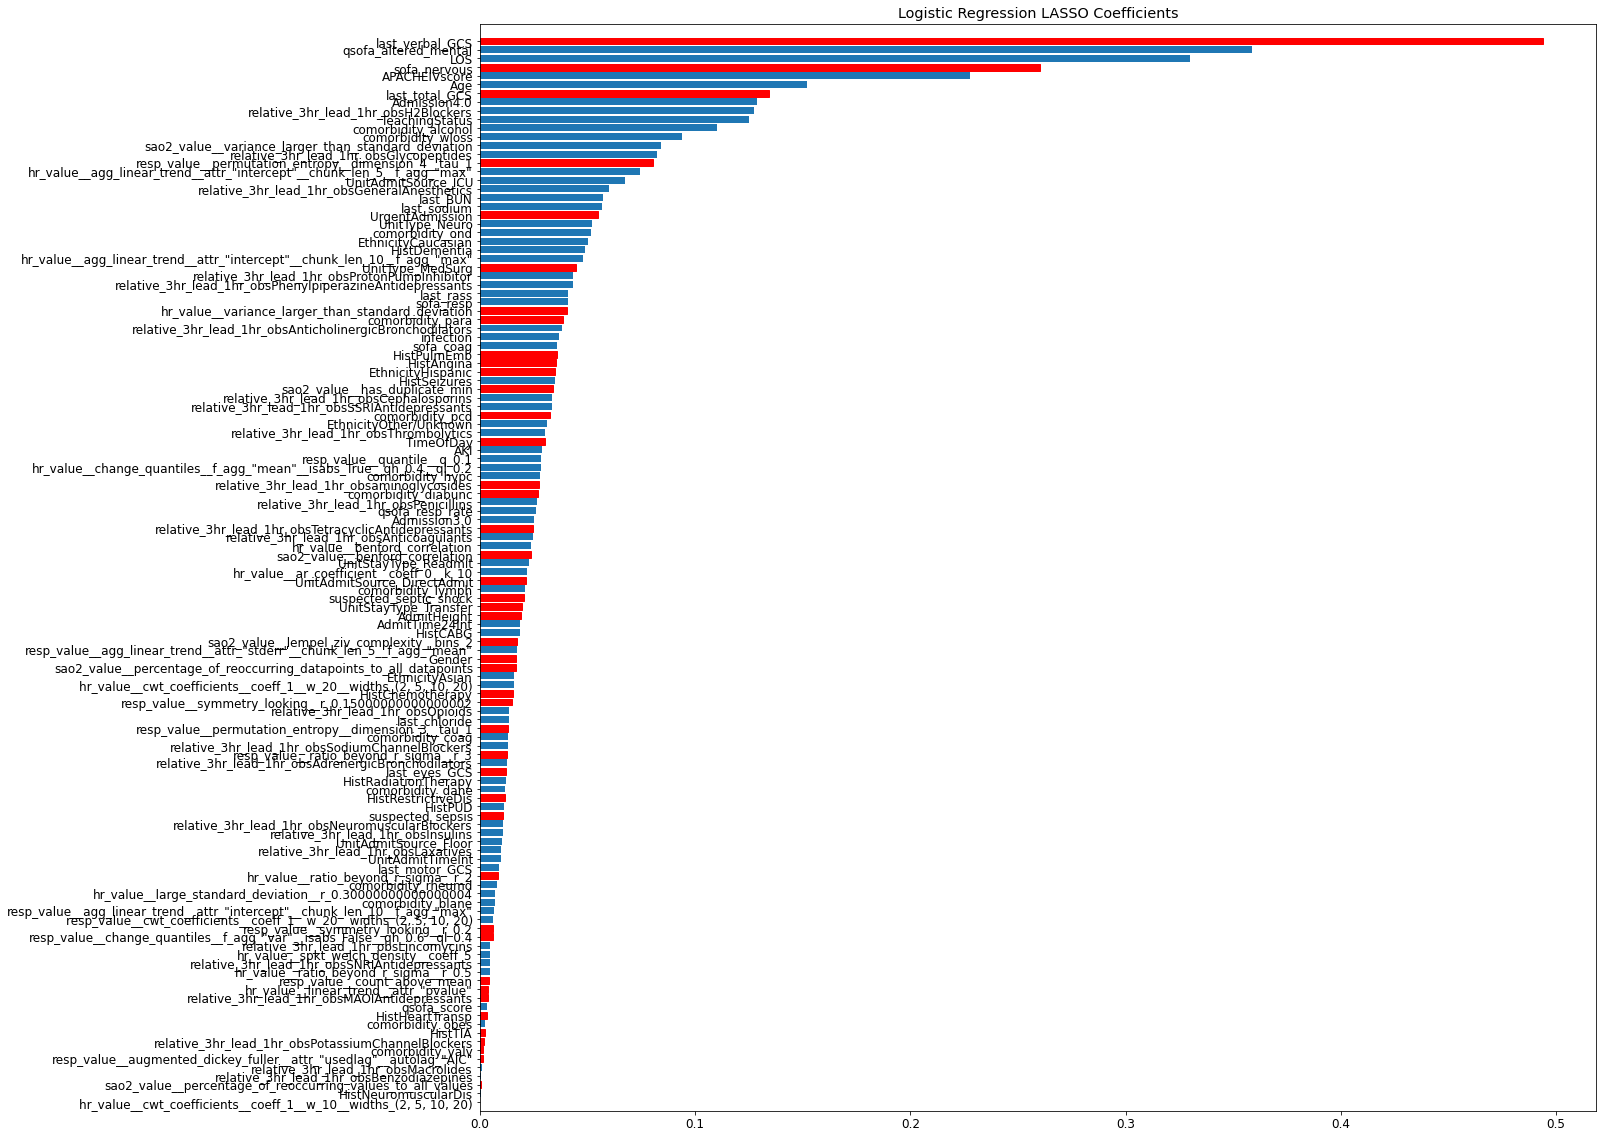

In [18]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

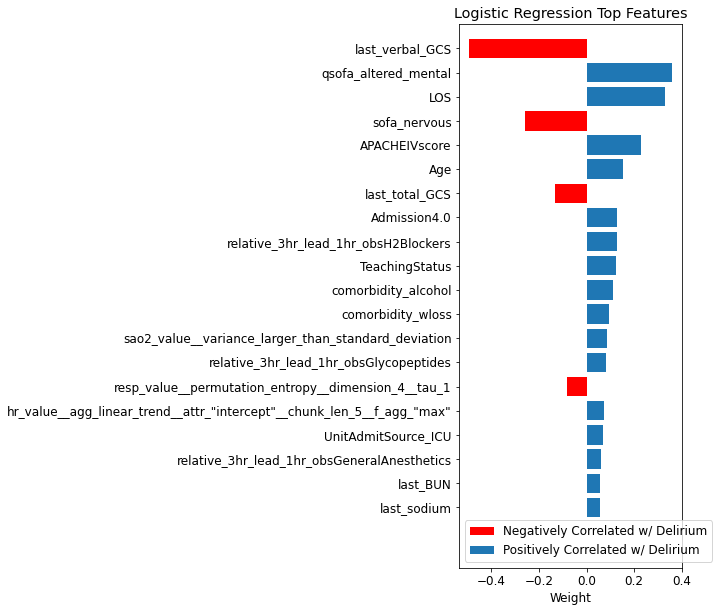

In [19]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_{}hr_lead_{}hr_obs/mean_unpruned_pts/lr_calibrated_coefficients_short.png'.format(lead, obs), dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

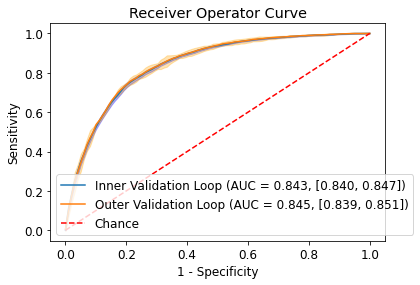

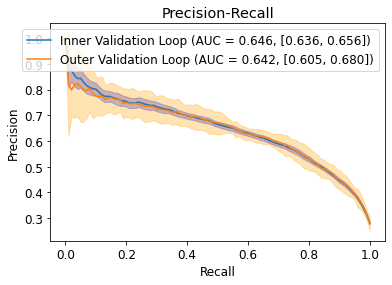

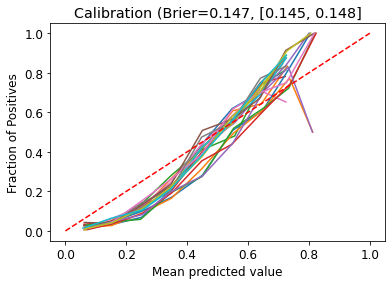

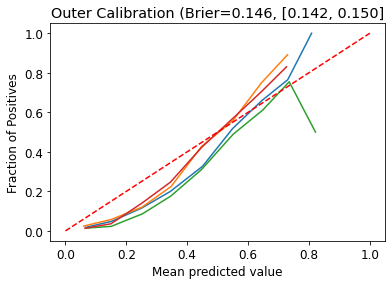

In [25]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_3hr_lead_1hr_obs/mean_unpruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

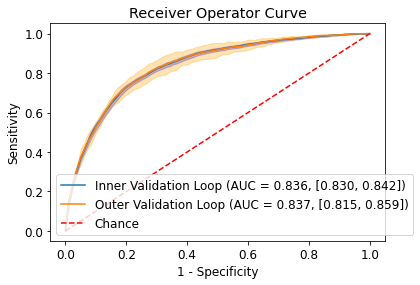

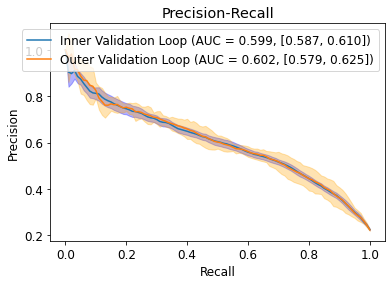

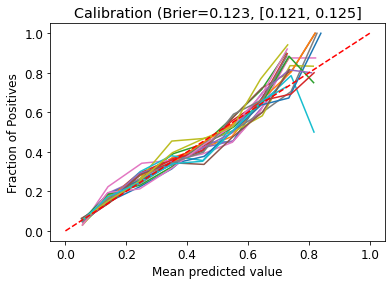

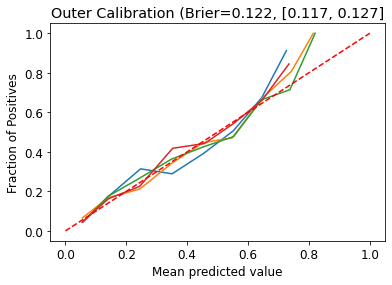

In [2]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_pruned_pts/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_3hr_lead_1hr_obs/mean_pruned_pts/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

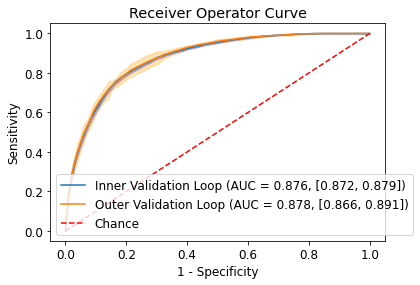

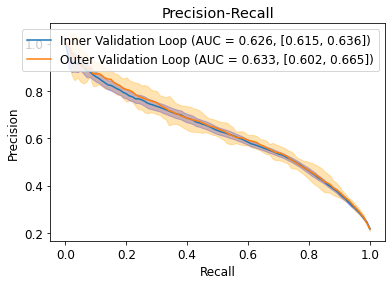

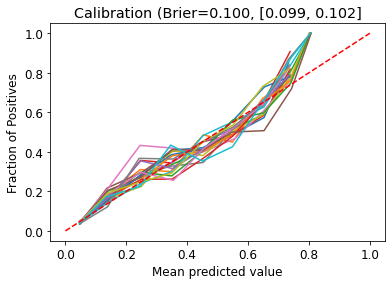

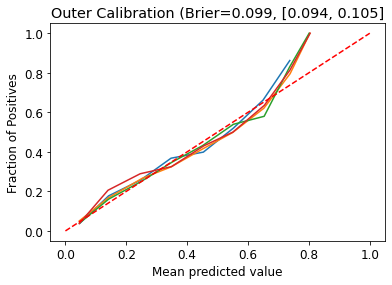

In [12]:
with open("../pickle/relative_3hr_lead_1hr_obs/mean_unpruned_pts/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_3hr_lead_1hr_obs/mean_unpruned_pts/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
# from catboost import CatBoostClassifier
# clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
# clf.fit(data_pruned.iloc[:,1:], labels)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
# shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
# plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")